In [1]:
import pandas as pd
import ast
import torch
from tqdm import tqdm

C:\Users\mosto\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
characters = pd.read_csv('../data/IMDB/movie_characters_metadata.tsv',
                         sep='\t',
                         warn_bad_lines=False,
                         error_bad_lines=False,
                         header=None
                         )
conversations = pd.read_csv('../data/IMDB/movie_conversations.tsv',
                            sep='\t',
                            warn_bad_lines=False,
                            error_bad_lines=False,
                            header=None
                            )

lines = pd.read_csv('../data/IMDB/movie_lines.tsv',
                    sep='\t',
                    warn_bad_lines=False,
                    error_bad_lines=False,
                    header=None
                    )
titles = pd.read_csv('../data/IMDB/movie_titles_metadata.tsv',
                     sep='\t',
                     warn_bad_lines=False,
                     error_bad_lines=False,
                     header=None
                     )

characters.columns = ['characterID', 'character', 'movieID', 'movie_title',
                      'gender',
                      'position']
conversations.columns = ['characterID_1', 'characterID_2', 'movieID', 'chrono']
lines.columns = ['lineID', 'characterID', 'movieID', 'character', 'text']
titles.columns = ['movieID', 'movie_title', 'movie_year', 'rating', 'imdb_votes', 'genres']

lines.dropna(inplace=True)
conversations.dropna(inplace=True)
titles.dropna(inplace=True)
characters.dropna(inplace=True)

C:\Users\mosto\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\mosto\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
def chrn(s, delim=' '):
    s1 = ast.literal_eval(s)
    to_ret = [delim + i for i in s1[0].split(delim)[1:]]
    return to_ret

In [3]:
def gnr(s):
    to_ret = [i[1:-1] for i in s.strip('][').split(' ')]
    return to_ret

In [34]:
Task 1. Data preparing

lns_chrs = dict(zip(lines.lineID, lines.characterID)) # Маппинг персонажей
lns = dict(zip(lines.lineID, lines.text)) # Маппинг текста
chars = dict(zip(characters.characterID, characters.character)) # Маппинг имен
floor = dict(zip(characters.characterID, characters.gender)) # Маппинг пола

titles['genres'] = titles['genres'].apply(lambda x: gnr(x))
titles_new = titles[['movieID', 'movie_title', 'genres']]

conversations['chrono'] = conversations['chrono'].apply(lambda x: chrn(x, delim='L'))
conversations['characters'] = conversations['chrono'].apply(lambda x: [lns_chrs[i] if i \
                                                                       in lns_chrs.keys() else 'unknown_character' for i in x])

conversations['genders'] = conversations['characters'].apply(lambda x: [floor[i] if i \
                                                                        in floor.keys() else '?' for i in x])

conversations['replics'] = conversations['chrono'].apply(lambda x: [lns[i] if i \
                                                                    in lns.keys() else 'unknown_text'for i in x])

conversations['names'] = conversations['characters'].apply(lambda x: [chars[i] if i \
                                                                      in chars.keys() else 'unknown_character 'for i in x])

conversations_new = conversations[['movieID', 'chrono', 'characters', 
                                   'genders', 'replics', 'names']]



df = conversations_new.merge(titles_new, on='movieID', how='left')
df.to_csv('films_prepared_v2.csv', index=False)

In [42]:
df = pd.read_csv('films_prepared_v2.csv')

In [43]:
df

,movieID,chrono,characters,replics,names,movie_title,genres
0,m0,"['L194', 'L195', 'L196', 'L197']","['u0', 'u2', 'u0', 'u2']",['Can we make this quick? Roxanne Korrine and...,"['BIANCA', 'CAMERON', 'BIANCA', 'CAMERON']",10 things i hate about you,"['comedy', 'romance']"
1,m0,"['L198', 'L199']","['u0', 'u2']","[""You're asking me out. That's so cute. What'...","['BIANCA', 'CAMERON']",10 things i hate about you,"['comedy', 'romance']"
2,m0,"['L200', 'L201', 'L202', 'L203']","['u0', 'u2', 'u0', 'u2']","[""No no it's my fault -- we didn't have a prop...","['BIANCA', 'CAMERON', 'BIANCA', 'CAMERON']",10 things i hate about you,"['comedy', 'romance']"
3,m0,"['L204', 'L205', 'L206']","['u2', 'u0', 'u2']","['Why?', 'Unsolved mystery. She used to be re...","['CAMERON', 'BIANCA', 'CAMERON']",10 things i hate about you,"['comedy', 'romance']"
4,m0,"['L207', 'L208']","['u0', 'u2']",['Gosh if only we could find Kat a boyfriend.....,"['BIANCA', 'CAMERON']",10 things i hate about you,"['comedy', 'romance']"
...,...,...,...,...,...,...,...
83092,m616,"['L666324', 'L666325', 'L666326', 'L666327']","['u9028', 'u9031', 'u9028', 'u9031']",['Do you think she might be interested in som...,"['COGHILL', 'MELVILL', 'COGHILL', 'MELVILL']",zulu dawn,"['action', 'adventure', 'drama', 'history', 'w..."
83093,m616,"['L666575', 'L666576']","['u9028', 'u9031']","[""Choose your targets men. That's right Watch ...","['COGHILL', 'MELVILL']",zulu dawn,"['action', 'adventure', 'drama', 'history', 'w..."
83094,m616,"['L666256', 'L666257']","['u9034', 'u9030']","[""Colonel Durnford... William Vereker. I hear ...","['VEREKER', 'DURNFORD']",zulu dawn,"['action', 'adventure', 'drama', 'history', 'w..."
83095,m616,"['L666369', 'L666370', 'L666371', 'L666372']","['u9030', 'u9034', 'u9030', 'u9034']","['Your orders Mr Vereker?', ""I'm to take the S...","['DURNFORD', 'VEREKER', 'DURNFORD', 'VEREKER']",zulu dawn,"['action', 'adventure', 'drama', 'history', 'w..."


In [44]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [45]:
df.replics = df.replics.apply(lambda x: eval(x))
df.names = df.names.apply(lambda x: eval(x))

In [46]:
sample = df.iloc[5527]
sample

movieID                                                      m40
chrono                                    ['L110045', 'L110046']
characters                                      ['u631', 'u641']
replics         [I'll wait... back there., Hamish I... thank...]
names                                          [HAMISH, WALLACE]
movie_title                                           braveheart
genres         ['action', 'biography', 'drama', 'history', 'w...
Name: 5527, dtype: object

In [66]:
def convert_to_dataset_torch(data: list):
    input_ids = []
    attention_masks = []
    
    for row in data:
        encoded_dict = tokenizer.encode_plus(row, 
                                             max_length=130,
                                             pad_to_max_length=True,
                                             return_attention_mask=True, 
                                             return_tensors='pt', 
                                             truncation=True)

        input_ids.append(encoded_dict['input_ids'])

        attention_masks.append(encoded_dict['attention_mask'])
        
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    input_ids.to(dtype=torch.long)
    attention_masks.to(dtype=torch.long)
    
    return input_ids, attention_masks

In [48]:
converted = convert_to_dataset_torch(sample.replics)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]C:\Users\mosto\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\tokenization_utils_base.py:2301: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 998.41it/s]


In [49]:
preds = model(input_ids=converted[0], 
      attention_mask=converted[1]).logits
                                    

In [50]:
preds

tensor([[-2.5469,  2.4831,  0.2947],
        [-3.3623,  1.8365,  1.7777]], grad_fn=<AddmmBackward0>)

In [51]:
labels = [
    'Positive',
    'Negative',
    'Neutral'
]

In [52]:
mapping = {i: k for i, k in enumerate(labels)}

In [53]:
mapping

{0: 'Positive', 1: 'Negative', 2: 'Neutral'}

In [54]:
predictions = torch.argmax(torch.nn.Softmax()(preds), axis=1)

C:\Users\mosto\AppData\Local\Temp\ipykernel_9840\1204985430.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predictions = torch.argmax(torch.nn.Softmax()(preds), axis=1)


In [55]:
df_local = pd.DataFrame({'Speaker': sample.names,
                         'Text': sample.replics,
                         'Emotion': list(map(lambda x: mapping.get(x, None), predictions.numpy()))})

In [56]:
df_local

,Speaker,Text,Emotion
0,HAMISH,I'll wait... back there.,Negative
1,WALLACE,Hamish I... thank...,Negative


In [57]:
emotion = df_local.groupby('Speaker')['Emotion'].value_counts(normalize=True)

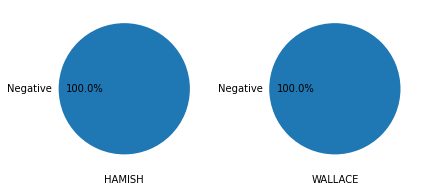

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure()

total_axes = df_local.Speaker.nunique()
subplt = 1 # номер начального axes
for x in emotion.index.get_level_values('Speaker').unique():
    ax = fig.add_subplot(1, total_axes, subplt) # добавляем axes для каждого графика
    plt.pie(emotion[x], labels=emotion[x].index.tolist(), autopct='%1.1f%%')
    plt.xlabel(x)
    subplt+=1

plt.tight_layout()
plt.show()

### Interface